## Πεπερασμένες διαφορές
________

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


plt.style.use("default")
plt.rcParams["figure.figsize"] = [5, 2.5]  # [width_inches, height_inches]
plt.rcParams["animation.html"] = "jshtml"


## Σειρές Taylor

Στόχος:

Ξεκινώντας από μία μη πολυωνυμική συνάρτηση $f(x)$ να βρεθεί ένα πολυώνυμο $P(x)$ \
(άπειρων όρων) το οποίο να είναι προσεγγιστικά ίσο με αυτή κοντά σε ένα σημείο.

Κοντά στο σημείο 0:
$$
\begin{equation*}
f(x) = c_0 + c_1x + c_2x^2 + c_3x^3 + \dots
\end{equation*}
$$

Πρέπει: $\quad f(0) = P(0), \; f'(0) = P'(0), \; \dots$
$$
\begin{equation*}
\Rightarrow f(x) = f(0) + \frac{f'(0)}{1!}x + \frac{f''(0)}{2!}x^2 + \frac{f'''(0)}{3!}x^3 + \dots
\end{equation*}
$$


### Άσκηση

Η εκθετική συνάρτηση προσεγγίζεται γύρω από το μηδέν από τη σειρά:

$$
\begin{equation*}
e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + \dots
\end{equation*}
$$

Σχεδιάστε το $e^x$ και τη σειρά Taylor στο ίδιο διάγραμμα προσθέτοντας διαδοχικά \
περισσότερους όρους στη δεύτερη (αρχίζoντας από το $1 + x$).

$-3 \leq x \leq 3, \quad \Delta x = 0.01 \quad$ (χρησιμοποιήστε τη συνάρτηση `np.arange`)

Για το παραγοντικό να κάνετε χρήση της συνάρτησης `np.math.factorial`

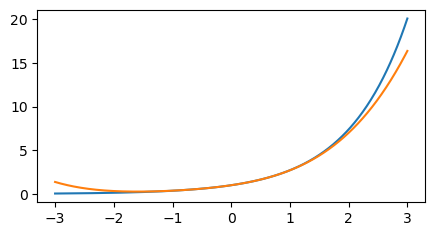

In [2]:
x = np.arange(-3, 3 + 0.01, 0.01)
fig, ax = plt.subplots()
plt.close()
y = np.exp(x)
y_taylor = (
    1
    + x
    + (x**2 / 2)
    + (x**3 / (np.math.factorial(3)))
    + (x**4 / (np.math.factorial(4)))
)

ax.plot(x, y)
ax.plot(x, y_taylor)

fig

### Animation σειράς Taylor

Το συνημίτονο γύρω από το μηδέν προσεγγίζεται από τη σειρά:
$$
\begin{align*}
&cos(x) = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} + \dots\\[12pt]
&cos(x) = \sum_{n=0}^{\infty} (-1)^n \frac{x^{2n}}{(2n)!}
\end{align*}
$$

In [3]:
x = np.arange(-3*np.pi, 3*np.pi + 0.01, 0.01)
y = np.cos(x)

y_taylor_terms = [np.repeat(1, len(x))]  # ο πρώτος όρος της σειράς (το 1) ως array μεσα σε λίστα
for n in range(1, 10):
    y_taylor_terms.append(((-1)**n) * (x**(2*n)) / np.math.factorial(2*n))

fig, ax = plt.subplots()
plt.close()

def animate(i):
    ax.clear()
    ax.plot(x, y, linewidth=3)
    ax.plot(x, np.sum(y_taylor_terms[0:i+1], axis=0), linewidth=1.5)
    ax.set_ylim([-1.05, 1.05])
    ax.set_xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi])
    ax.set_xticklabels(["-2π", "-π", "0", "π", "2π"])
    ax.set_title(f"Πλήθος όρων: N={i+1}", fontweight="bold", loc="left")

ani = FuncAnimation(
    fig=fig,
    func=animate,
    frames=len(y_taylor_terms),
    interval=1000,
    repeat=False,
)
plt.close()

ani


Σειρά Taylor γύρω από το σημείο $x_0$:

$$
\begin{equation*}
f(x) = f(x_0) + \frac{f'(x_0)}{1!}(x-x_0) + \frac{f''(x_0)}{2!}(x-x_0)^2 + \frac{f'''(x_0)}{3!}(x-x_0)^3 + \dots
\end{equation*}
$$

Θέτοντας $x - x_0 = h$:

$$
\begin{equation*}
f(x_0 + h) = f(x_0) + f'(x_0)h + \frac{f''(x_0)}{2!}h^2 + \frac{f'''(x_0)}{3!}h^3 + \dots
\end{equation*}
$$

$x \rightarrow x_0$:

$$
\begin{equation*}
f(x + h) = f(x) + f'(x)h + \frac{f''(x)}{2!}h^2 + \frac{f'''(x)}{3!}h^3 + \dots
\end{equation*}
$$

### Προσεγγιστικός υπολογισμός των παραγώγων

$$
\begin{equation*}
u(x + h) = u(x) + u'(x)h + \frac{u''(x)}{2!}h^2 + \frac{u'''(x)}{3!}h^3 + \frac{u''''(x)}{4!}h^4 + \dots
\end{equation*}
$$

$$
\begin{equation*}
u(x - h) = u(x) - u'(x)h + \frac{u''(x)}{2!}h^2 - \frac{u'''(x)}{3!}h^3 + \frac{u''''(x)}{4!}h^4 + \dots
\end{equation*}
$$

- Πρώτη παράγωγος forward-difference:
$$
\begin{equation*}
u'(x) = \frac{u(x+h) - u(x)}{h} + \mathcal{O}(h)
\end{equation*}
$$

- Πρώτη παράγωγος backward-difference:
$$
\begin{equation*}
u'(x) = \frac{u(x) - u(x-h)}{h} + \mathcal{O}(h)
\end{equation*}
$$

- Πρώτη παράγωγος centered-difference:
$$
\begin{equation*}
u'(x) = \frac{u(x+h) - u(x-h)}{2h} + \mathcal{O}(h^2)
\end{equation*}
$$

- Δεύτερη παράγωγος centered-difference:
$$
\begin{equation*}
u''(x) = \frac{u(x-h) -2u(x) + u(x+h)}{h^2} + \mathcal{O}(h^2)
\end{equation*}
$$

### Πεπερασμένες διαφορές


- Πρώτη παράγωγος forward-difference:
$$
\begin{equation*}
\frac{\partial u_i}{\partial x} \simeq \frac{u_{i+1} - u_i}{h}
\end{equation*}
$$

- Πρώτη παράγωγος backward-difference:
$$
\begin{equation*}
\frac{\partial u_i}{\partial x} \simeq \frac{u_i - u_{i-1}}{h}
\end{equation*}
$$

- Πρώτη παράγωγος centered-difference:
$$
\begin{equation*}
\frac{\partial u_i}{\partial x} \simeq \frac{u_{i+1} - u_{i-1}}{2h}
\end{equation*}
$$

- Δεύτερη παράγωγος centered-difference:
$$
\begin{equation*}
\frac{\partial^2 u_i}{\partial x^2} \simeq \frac{u_{i-1} -2u_i + u_{i+1}}{h^2}
\end{equation*}
$$

### Επιλογή πολλαπλών στοιχείων (slicing) ενός πίνακα

In [4]:
a = np.array([3, 5, 1, 0, 5, 7, 9])


|    Τιμές του array    |  3  |  5  |  1  |  0  |  5  |  7  |  9  |
| --------------------- | --- | --- | --- | --- | --- | --- | --- |
|                       |     |     |     |     |     |     |     |
| Αρίθμηση              | 0   | 1   | 2   | 3   | 4   | 5   | 6   |
| Αρίθμηση από το τέλος | -7  | -6  | -5  | -4  | -3  | -2  | -1  |


In [5]:
# πρώτο έως και προτελευταίο στοιχείο
a[0:-1]  # ή a[:-1]


array([3, 5, 1, 0, 5, 7])

### Άσκηση 

Εφαρμόστε τα κατάλληλα slices στον πίνακα `a` για τις περιπτώσεις που ακολουθούν:

In [6]:
# δεύτερο έως και τελευταίο στοιχείο
a[1:]

array([5, 1, 0, 5, 7, 9])

In [7]:
# δεύτερο έως και προτελευταίο στοιχείο
a[1:-1]

array([5, 1, 0, 5, 7])

In [8]:
# τρίτο έως και τελευταίο στοιχείο
a[2:]

array([1, 0, 5, 7, 9])

In [9]:
# πρώτο έως και προ-προτελευταίο στοιχείο
a[0:-2]

array([3, 5, 1, 0, 5])

### Δημιουργία μηδενικού πίνακα

    np.zeros((rows, cols))

### Δημιουργία μηδενικού πίνακα με βάση έναν άλλο πίνακα
    np.zeros_like(a)

### Άσκηση

Δημιουργήστε έναν μηδενικό πίνακα με βάση τον πίνακα `a`:

In [10]:
a = np.array([
    [3, 5, 0],
    [1, 1, 2]
])

b = np.zeros_like(a)
b


array([[0, 0, 0],
       [0, 0, 0]])

### Δημιουργία κενού πίνακα

    np.full((rows, cols), np.nan)

### Δημιουργία κενού πίνακα με βάση έναν άλλο πίνακα
    np.full(a.shape, np.nan)

### Άσκηση

Δημιουργήστε έναν κενό πίνακα με βάση τον πίνακα a:

In [11]:
a = np.array([
    [3, 5, 0],
    [1, 1, 2]
])

b = np.full(a.shape, np.nan)
b

array([[nan, nan, nan],
       [nan, nan, nan]])

### Πεπερασμένες διαφορές

### Backward-difference

In [12]:
a = np.array([1, 5, 9, 13, 17])


Φτιάξτε έναν νέο πίνακα όπου κάθε στοιχείο του να είναι ίσο με το αντίστοιχο \
στοιχείο του `a` μείον το προηγούμενο του `a`.

$b_i = a_i - a_{i-1}$

In [13]:
b = np.full(a.shape, np.nan)
b


array([nan, nan, nan, nan, nan])

In [14]:
b[1:] = a[1:] - a[0:-1]
b


array([nan,  4.,  4.,  4.,  4.])

Φτιάξτε έναν νέο πίνακα όπου κάθε στοιχείο του είναι ίσο με το αντίστοιχο στοιχείο \
του `a` μείον το διπλάσιο του προηγούμενου του `a`.

$c_i = a_i - 2a_{i-1}$

In [15]:
c = np.full(a.shape, np.nan)
c[1:] = a[1:] - 2*a[0:-1]
c

array([nan,  3., -1., -5., -9.])

### Άσκηση

Υπολογίστε τις πεπερασμένες διαφορές για τις παρακάτω περιπτώσεις:

### Forward-difference

In [16]:
d = np.array([1, 2, 4, 7, 11, 16])

Υπολογίστε τον παρακάτω πίνακα:

$e_i = d_{i+1} - d_i$

In [17]:
e = np.full(d.shape, np.nan)
e[0:-1] = d[1:] - d[0:-1]
e


array([ 1.,  2.,  3.,  4.,  5., nan])

### Centered-difference

In [18]:
f = np.array([0, 2, 10, 12, 2, 0])

Υπολογίστε τον παρακάτω πίνακα:

$g_i = (f_{i+1} + f_{i-1})/2$

In [19]:
g = np.full(f.shape, np.nan)

g[1:-1] = (f[2:] + f[0:-2]) / 2
g

array([nan,  5.,  7.,  6.,  6., nan])

### Πεπερασμένες διαφορές, εφαρμογή στις παραγώγους

$-3 \leq x \leq 3, \quad h = 0.01 \quad$

$u(x) = x^2$

$u'(x) = 2x$

$u''(x) = 2$

In [20]:
h = 0.01
x = np.arange(-3, 3 + h, h)

u = x**2
dudx = 2 * x
d2udx2 = np.repeat(2, repeats=len(x))


- Πρώτη παράγωγος forward-difference:

$$
\begin{equation*}
\frac{\partial u_i}{\partial x} \simeq \frac{u_{i+1} - u_i}{h}
\end{equation*}
$$


In [21]:
dudx_forward = np.full(u.shape, np.nan)

dudx_forward[0:-1] = (u[1:] - u[0:-1]) / h


### Άσκηση

Υπολογίστε τις παραγώγους με πεπερασμένες διαφορές στις περιπτώσεις που ακολουθούν:

- Πρώτη παράγωγος backward-difference:
$$
\begin{equation*}
\frac{\partial u_i}{\partial x} \simeq \frac{u_i - u_{i-1}}{h}
\end{equation*}
$$


In [22]:
dudx_backward = np.full(u.shape, np.nan)

dudx_backward[1:] = (u[1:] - u[0:-1]) / h



- Πρώτη παράγωγος centered-difference:
$$
\begin{equation*}
\frac{\partial u_i}{\partial x} \simeq \frac{u_{i+1} - u_{i-1}}{2h}
\end{equation*}
$$


In [23]:
dudx_centered = np.full(u.shape, np.nan)

dudx_centered[1:-1] = (u[2:] - u[0:-2]) / (2 * h)



- Δεύτερη παράγωγος centered-difference:
$$
\begin{equation*}
\frac{\partial^2 u_i}{\partial x^2} \simeq \frac{u_{i-1} -2u_i + u_{i+1}}{h^2}
\end{equation*}
$$


In [24]:
d2udx2_centered = np.full(u.shape, np.nan)

d2udx2_centered[1:-1] = (u[0:-2] - 2 * u[1:-1] + u[2:]) / (h**2)


### Υπολογισμός της ακρίβειας των αριθμητικών σχημάτων

Mean absolute error (MAE):

$$
\begin{equation*}
MAE = \frac{1}{n} \sum_{n=1}^n |y_{true} - y_{pred}|
\end{equation*}
$$

### Άσκηση

Ορίστε μια καινούργια συνάρτηση η οποία θα υπολογίζει το MAE.

(χρησιμοποιήστε το `np.abs` για την απόλυτη τιμή)

Στη συνέχεια εφαρμόστε τη συνάρτηση για να βρείτε την ακρίβεια των παραπάνω \
πεπαρασμένων διαφορών για την περίπτωση της 1ης και 2ης παραγώγου του $x^2$.

In [25]:
def mae(ytrue, ypred):
    return np.nanmean(np.abs(ytrue - ypred))


In [26]:
mae(dudx, dudx_backward)

0.009999999999999787

In [27]:
mae(dudx, dudx_forward)

0.009999999999999787

In [28]:
mae(dudx, dudx_centered)

6.380514544706088e-14

### Άσκηση

Θα μπορούσαμε να χρησιμοποιήσουμε τη συνάρτηση [mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn-metrics-mean-absolute-error), από το \
module `sklearn.metrics` αλλά θα πρέπει προηγουμένως να [διώξουμε τις `np.nan` τιμές](https://stackoverflow.com/a/11620982/16664119).

Προσπαθήστε να τη χρησιμοποιήσετε για την περίπτωση της πρώτης παραγώγου centered-difference.


In [29]:
from sklearn.metrics import mean_absolute_error

In [30]:
dudx = dudx[~np.isnan(dudx_centered)]
dudx_centered = dudx_centered[~np.isnan(dudx_centered)]

In [31]:
mean_absolute_error(dudx, dudx_centered)

6.380514544706088e-14